# Regex
A regular expression (or RE) specifies a set of strings that matches it; the functions in this module let you check if a particular string matches a given regular expression (or if a given regular expression matches a particular string, which comes down to the same thing).

https://docs.python.org/3/library/re.html

## src

In [ ]:
import re
from IPython.core.display import HTML
from pprint import pprint

def show(pat, s, flags=re.M):
    if isinstance(pat, str):
        pat = re.compile(pat, flags)
    new = pat.sub(r'·<font color="##AA0000"><b>\g<0></b></font>·', s)
    new = new.replace('\n', '<br/>')
    return HTML(new)

rhyme = '''
Mary had a little lamb
Its fleece as white as snow
And everywhere that Mary
went, the lamb was sure
to go
'''.strip()

couplet = '''
Mary had a little lamb
Its fleece as white as snow
'''.strip()


рифма = '[*] у Мэри был маленький ягненок!'

parts = '''
FORD-2008-xyz37
FORD-1998-ef445
TOYO-1999-wxy66
TOYO-2005-qrst3
FORD-2010-ab614
MAZD-1995-pqr33
TOYO-2013-fg185
TOYO-1997-abc23
FORD-2012-lm034
'''.strip()

## Basics

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
with open("/content/drive/MyDrive/regex_ex/data/rhyme.txt", "r") as f:
    data = f.read()

data

'Mary had a little lamb\nIts fleece as white as snow\nAnd everywhere that Mary\nwent, the lamb was sure\nto go'

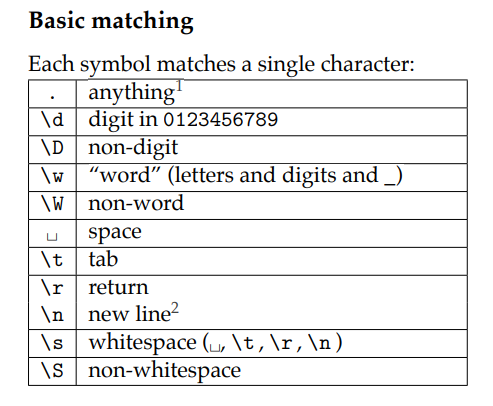

In Python 

`.`

(Dot.) In the default mode, this matches any character except a newline. If the DOTALL flag has been specified, this matches any character including a newline.

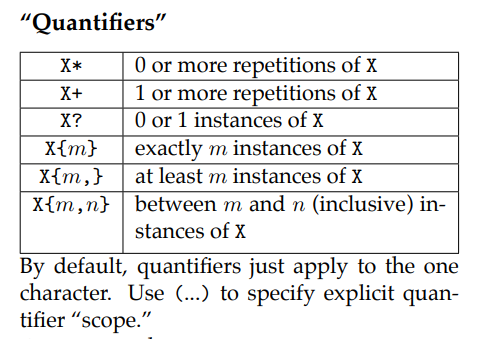

In [ ]:
show(r'\bMa.y\b', rhyme)

In [ ]:
show(r'lee?', rhyme)

In [ ]:
show(r'.e+', rhyme)

In [ ]:
show(r'\w*e+\w*', rhyme)

In [ ]:
show(r'fleece as .+\b', rhyme) ## newline does not match the dot(.)

In [ ]:
## Want to match just "some characters until word boundary" 

show(r'fleece as .+\b', rhyme, re.DOTALL)

**There is a problem in above that is the subpattern .* or .+ wants to match as much as it can; it needs to end with a word boundary, but the entire ditty does. the solution is to transform quantifiers into their non-greedy form.**


Quantifier  |             Behavior
------------|----------------------------------
*?          |  Zero or more, as few as possible
+?          |  One or more, as few as possible
??          |  Zero or one, as few as possible


In [ ]:
## successfully match just "some characters until word boundary"
show(r'fleece as .+?\b', rhyme, re.DOTALL)

In [ ]:
## Match from 10-32 characters ending at word boundary
show(r'fleece as .{10,32}\b', rhyme, re.DOTALL)

In [ ]:
## Non-greedy match from 10-32 characters ending at word boundary
show(r'fleece as .{10,32}?\b', rhyme, re.DOTALL)

## in this after 10 character it is looking for word boundary and it stops there

In [ ]:
## Match exactly 15 characters ending at word boundary (FAIL)
show(r'fleece as .{15}\b', rhyme, re.DOTALL)

In [ ]:
## Match exactly 17 characters ending at word boundary (SUCCESS)
show(r'fleece as .{17}\b', rhyme, re.DOTALL)

In [ ]:
## Match at least 15 characters ending at word boundary
show(r'fleece as .{15,}\b', rhyme, re.DOTALL)

## after "," in {15,} nothing is there so it goes to all characters without limit

Syntax         |  Description
---------------|--------------
x*?, x+?, etc. |  match the minimum number of times - known as a lazy quantifier


In [ ]:
## Non-greedy match at least 15 chars ending at word boundary
show(r'fleece as .{15,}?\b', rhyme, re.DOTALL)

## Groups, Classes and Alternation

### Classes

Wildcard | Class           | Behavior
---------|-----------------|---------
\d       | [0-9]           | Any decimal digit
\D       | [^0-9]          | Any non-digit character
\s       | [ \t\n\r\f\v]   | Any whitespace character
\S       | [^ \t\n\r\f\v]  | Any non-whitespace character
\w       | [a-zA-Z0-9_]    | Any alphanumeric character
\W       | [^a-zA-Z0-9_]   | Any non-alphanumeric character



In [ ]:
## first half of alphabet
show(r'[A-Ma-m]+', rhyme)

In [ ]:
## second half of alphabet (exclude spaces, comma, etc)
show(r'[^A-Ma-m, \n]+', rhyme)

In [ ]:
## second half of alphabet (alternative)
show(r'[N-Zn-z]+', rhyme)

In [ ]:
## arbitrary character class
show(r'[aeioubdlth]+', rhyme)

In [ ]:
## Any cap, any vower, second half of lower case
show(r'[A-Zaeioun-z]+', rhyme)

### Other Alphabets

As mentioned, unfamiliar alphabets may not have an obvious character order for you. Unless the ASCII-only flag is used(re.ASCII or re.A), for example, all letter-like characters in Unicode are matched by \w. Belwo is a gough Russian translation of "Mary had as little lamb."

In [ ]:
print(рифма)

[*] у Мэри был маленький ягненок!


In [ ]:
## Match sequences of letter-like characters, even in Cyrillic
show(r'\w+', рифма)

We might perform the same match using character ranges, but we will need to know the Unicode order of the Cyrillic letters. The same concern, obviously, applies to any alphabet.

In [ ]:
show(r'[А-Яa-я]+', рифма)

In [ ]:
show(r'[А-Жa-п]+', рифма)

In [ ]:
show(r'\u0000gmail', 'example@gmail', re.UNICODE)

In [ ]:
re.match(r'^/by_tag/(?P<tag>\w+)/(?P<filename>(\w|[.,!#%{}()@])+)$', u'/by_tag/påske/øyfjell.jpg', re.UNICODE).groupdict()


{'tag': 'påske', 'filename': 'øyfjell.jpg'}

### Grouping

Let us look for a particular pattern. We want substrings that start with a consonant, and where each consonant cluster is followed by the exactly one vowel, but potentially multiple occurences of that alternation. The mathc is terminated by a word boundary.

In [ ]:
pat = r'([Mbcdfghjklmnpqrstvwxz]+[aeiouy])+\b'
show(pat, rhyme)

### Alternation

Along with repetition of patterns, you may also specify alternation among patterns. In the simplest case, this can be simply a choice among literals. It is sometimes required, and usually helpful, to put parenthesis around the alternation groups.

In [ ]:
show(r'(fleece)|(lamb)|(white)', rhyme)

Often it is useful to use subpatterns within the alternation. For example, let us look for words that either:
* Begin with a vowel and are one or two letters long;
* Begin with a consonent and are 5 or more letters.

In [ ]:
## Some letters omitted from classes to shorten
## One initial letter then quantified rest counting the start

show(r"\b([AEIOUaeiou]\w?|[bcdfghlmMnrstvw]\w{4,})\b", rhyme)

We can combine these techniques further. For example, let us identify all sequences of 3 to 7 words matching our somewhat odd criteria. That is, we quantify an alternation group.

In [ ]:
pat = r'(\b([AEIOUaeiou]\w?|[bcdfghlmMnrstvw]\w{4,})\s+){3,7}' 
show(pat, rhyme)

## Verbose 

This flag allows you to write regular expressions that look nicer and are more readable by allowing you to visually separate logical sections of the pattern and add comments. Whitespace within the pattern is ignored, except when in a character class, or when preceded by an unescaped backslash, or within tokens like *?, (?: or (?P<...>. 

In [ ]:
## simple pattern for matching URL
pat = r"""      # identify URLs within a multiline string
(https?|ftp)     # make sure we find a resource type
        ://     # needs to be followed by colon-slash-slash
    [^ ,\t\n]+  # stuff other than comma, space, tab, newline
        """

s = '''The URL for my site is: http://example.com/mydoc.html. You
might also enjoy ftp://example.org/index.html for a good place 
to download files. A URL might end its line:

https://example.net/secure
'''

show(pat, s, re.VERBOSE)

## Lookahead and Lookbehind

Sometimes in regex, you wish to make assertions about patterns without actually including the subpattern in the match.

### Lookahead

`(?=...)`

Matches if ... matches next, but doesn’t consume any of the string. This is called a lookahead assertion. For example, Isaac (?=Asimov) will match 'Isaac ' only if it’s followed by 'Asimov'.

In [ ]:
show(r'[ae](?=[dmr])', rhyme)

In [ ]:
print(parts)

FORD-2008-xyz37
FORD-1998-ef445
TOYO-1999-wxy66
TOYO-2005-qrst3
FORD-2010-ab614
MAZD-1995-pqr33
TOYO-2013-fg185
TOYO-1997-abc23
FORD-2012-lm034


### Lookbehind

`(?<=...)`

looks at previous characters for a match without using those in the match

In [ ]:
## We would like to match only the collection of years for which we have toyota 
## parts. This is a "lookbehind" question rather than "lookahead"

show(r'(?<=^TOYO-)\d{4}', parts)

In [ ]:
## We would like the years of Ford parts that use a two letter part code rather than 
## the three or four letter version that some parts have. Moreover, 
## we only want the years for parts made after year 2000.

show(r'(?<=^FORD-)2\d{3}(?=-[a-z]{2}\d)', parts)

In [ ]:
show(r'(?<=^FORD-)2\d{3}(?=-[^0-9]{2}\d)', parts)

### Lookahead not

`(?!x)`

looks ahead at next characters to not match on



### Lookbehind not

`(?<!x)`

looks at previous characters to not match on

In [ ]:
show(r'(?<!^MAZD-)\d{4}(?!-\D{4})', parts)

If the regular expression uses the `(?P<name>...)` syntax, the groupN arguments may also be strings identifying groups by their group name. If a string argument is not used as a group name in the pattern, an IndexError exception is raised.

In [ ]:
m = re.match(r"(?P<first_name>\w+) (?P<last_name>\w+)", "Malcolm Reynolds")
m.group('first_name')

'Malcolm'

In [ ]:
m.group('last_name')

'Reynolds'

Named groups can also be referred to by their index:

In [ ]:
m.group(1)

'Malcolm'

In [ ]:
m.group(2)

'Reynolds'

In [ ]:
m.group(1, 2)

('Malcolm', 'Reynolds')

If a group matches multiple times, only the last match is accessible:

In [ ]:
m = re.match(r"(..)+", "a1b2c3")  # Matches 3 times.
m.group(1)                        # Returns only the last match.

'c3'

In [ ]:
m.groups()

('c3',)

In [ ]:
str = 'purple alice-b@google.com monkey dishwasher'
match = re.search(r'([\w.-]+)@([\w.-]+)', str)
if match:
    print(match.group())   ## 'alice-b@google.com' (the whole match)
    print(match.group(1))  ## 'alice-b' (the username, group 1)
    print(match.group(2))  ## 'google.com' (the host, group 2)

alice-b@google.com
alice-b
google.com


### Capturing 

Syntax        |  Description
--------------|-------------
`(x)`           |  capturing a pattern
`(?:x)`         |  create a group without capturing
`(?P<name>x)` |  create a named capture group
`(x\|y) `       |  match several alternative patterns


In [ ]:
show(r"(iss)+", "Mississippi abcdabc")

In [ ]:
show(r"(?:ab)(cd)", "abcd")

In [ ]:
re.match(r"(?:ab)(cd)", "abcd").groups()

('cd',)

In [ ]:
re.match(r"(?P<first>\d)(?P<second>\d)\d*", "12345").groups()

('1', '2')

In [ ]:
show(r"(iss|abc)+", "Mississippi abcdabc")

## Back referencing

Back refrences, either named or numbered, may be used within a pattern as well.
In a somewhat contrived example, let us capture the parallel comparision words in the nursery rhyme, i.e. "fleece as white as snow" in this case.

In [ ]:
show(r'(fleece) (?P<word>\w+) (\w+) (?P=word) (\w+)', rhyme)

In [ ]:
pat = (r'(?<!^MAZD-)'
        r'(1\d{3})'
        r'(-.*)')
new = r'OBS\2(\1)'
revised = re.sub(pat, new, parts, flags=re.MULTILINE)

show(r'OBS.*', revised)

what happened in that above pattern is that two groups were automatically named \1 and \2 for purposes of back reference in a replacement pattern. A lookbehind assertion superficially looks like a group, but it does not count as one for purposes of back reference. The same applies to lookahed assertions, and to either possitive or negative assertions in either direction.

When a complex regular expression has multiple groups, back refrencing them by number can get confusing. In fact, if you have more than 9 groups, the syntax does not support back refrence at all by number. In this case, you can use named groups The syntax is a bit verbose compared to other regular expression elements, but it can add clarity.

In [ ]:
pat = (r'(?<!^MAZD-)'
        r'(?P<year>1\d{3})'
        r'(?P<code>-.*)')
new = r'OBS\g<code>(\g<year>)'
revised = re.sub(pat, new, parts, flags=re.MULTILINE)

show(r'OBS.*', revised)

## Python Functions

### re.compile(pattern, flags=0)

Compile a regular expression pattern into a regular expression object, which can be used for matching using its match(), search() and other methods.

The expression’s behaviour can be modified by specifying a flags value. Values can be any of the following variables, combined using bitwise OR (the | operator).

using re.compile() and saving the resulting regular expression object for reuse is more efficient when the expression will be used several times in a single program.